In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew,kurtosis

In [2]:
df=pd.read_csv("data.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Non numerical columns
df_object=df.loc[:,df.dtypes==np.object]
len(df_object.columns)

43

In [5]:
#Numerical columns
df_num=df.loc[:,df.dtypes!=np.object]
len(df_num.columns)


38

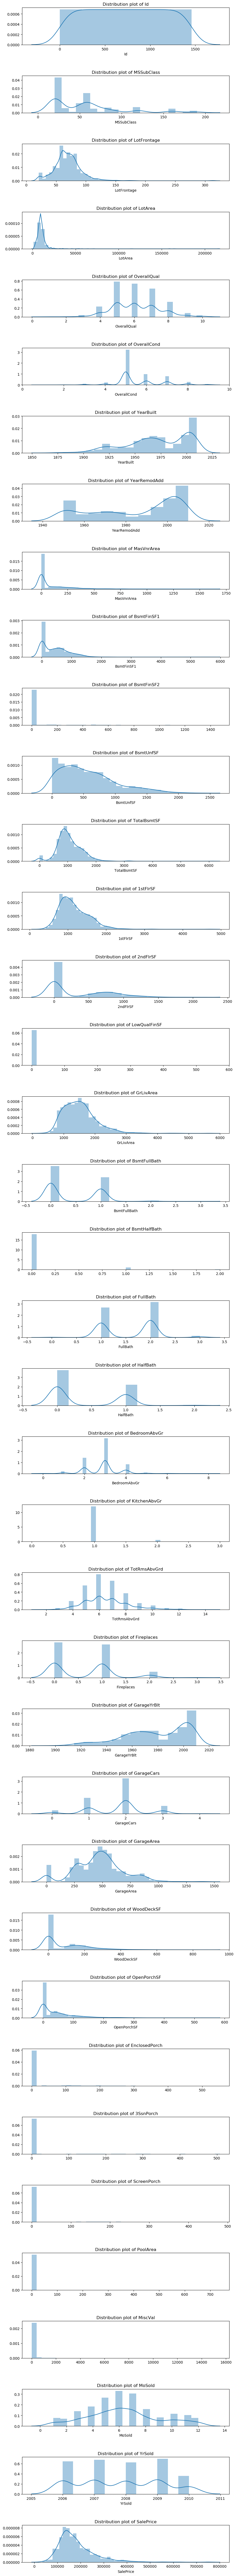

In [6]:
#distribution plot
fig = plt.figure(figsize=(10,100),dpi=100)
for index,col in enumerate(df_num):
    plt.subplot(38,1,index+1,title="Distribution plot of %s" %(col))
    try:
        sns.distplot(df_num.loc[:,col].dropna(),kde=25)
    except:
        print()
fig.tight_layout(pad=4.0)

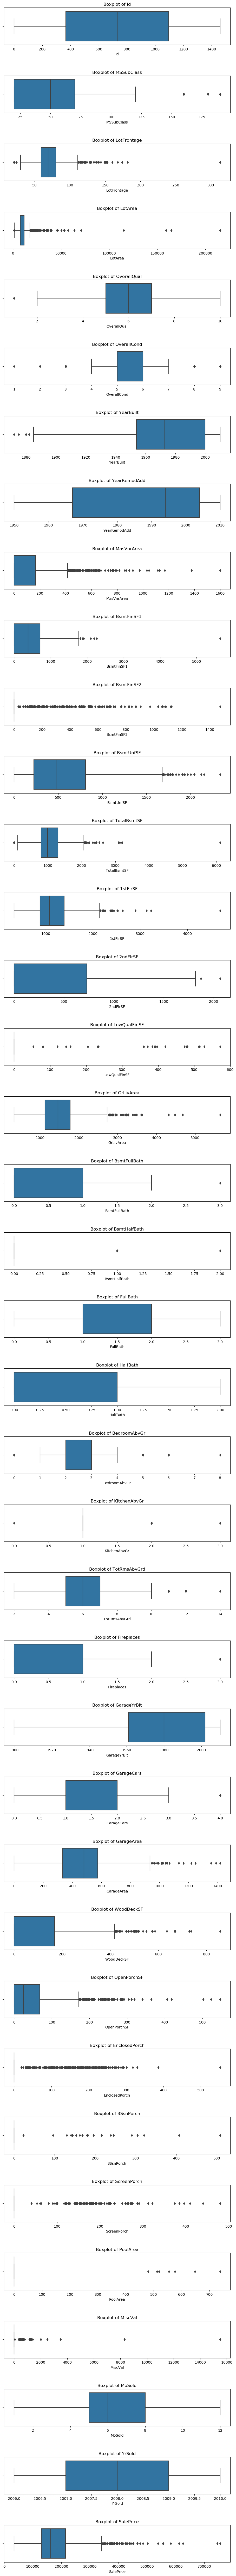

In [7]:
#Boxplot
fig = plt.figure(figsize=(10,100),dpi=100)
for index,col in enumerate(df_num):
    plt.subplot(38,1,index+1,title="Boxplot of %s" %(col))
    sns.boxplot(df_num.loc[:,col].dropna())
fig.tight_layout(pad=4.0)

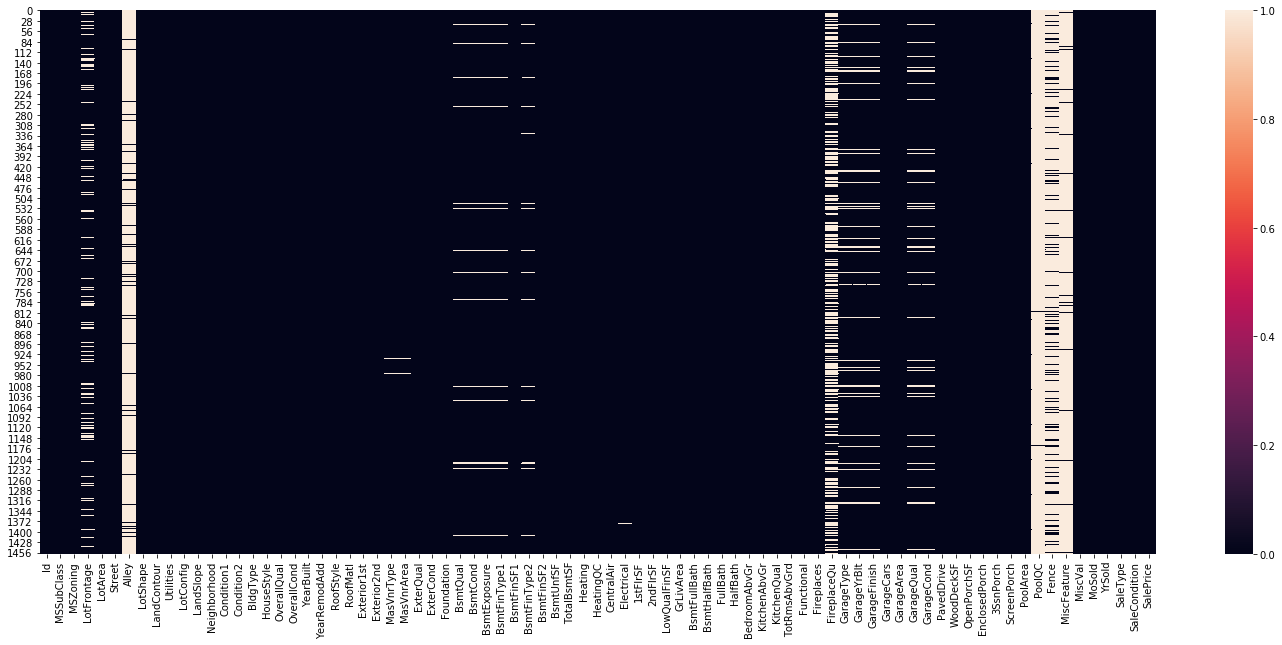

In [8]:
#Heatmap for null values
fig=plt.figure(figsize=(25,10))
sns.heatmap(df.isnull())

In [9]:
del_features=['Id','Street','Alley','Utilities','Condition2','RoofMatl','2ndFlrSF','Exterior2nd','MasVnrType','MasVnrArea','ExterCond','BsmtQual','BsmtFinType2','BsmtFinSF2','Heating','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','Functional','FireplaceQu','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal']
df.drop(del_features,inplace=True,axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,2,548,TA,Y,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,RFn,2,460,TA,Y,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,2,608,TA,Y,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Unf,3,642,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,RFn,3,836,TA,Y,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,RFn,2,460,TA,Y,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,Unf,2,500,TA,Y,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,RFn,1,252,TA,Y,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,Unf,1,240,TA,Y,4,2010,WD,Normal,142125


In [11]:
df_obj1=df.loc[:,df.dtypes==np.object]
print(len(df_obj1.columns))


26


In [12]:
df_num1=df.loc[:,df.dtypes!=np.object]
len(df_num1.columns)


23

In [13]:
#Filling null values
df['BsmtFinSF1'].replace(0,df['BsmtFinSF1'].mean(),inplace=True)
df['BsmtUnfSF'].replace(0,df['BsmtUnfSF'].mean(),inplace=True)
df['TotalBsmtSF'].replace(0,df['TotalBsmtSF'].mean(),inplace=True)

df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0]) 
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0]) 
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

df['BsmtCond'].replace(np.nan,'No class',inplace=True)
df['BsmtFinType1'].replace(np.nan,'No class',inplace=True)
df['GarageFinish'].replace(np.nan,'No class',inplace=True)

df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)


In [14]:
df_object=df.loc[:,df.dtypes==np.object]
df_object.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'ExterQual', 'Foundation', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

##Label encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
new_df=df.copy()
new_df[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'ExterQual', 'Foundation', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition']]=new_df[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'ExterQual', 'Foundation', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition']].apply(label.fit_transform)

In [16]:
new_df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,3,3,4,0,5,2,...,2,2,548,4,2,2,2008,8,4,208500
1,20,3,80.0,9600,3,3,2,0,24,1,...,2,2,460,4,2,5,2007,8,4,181500
2,60,3,68.0,11250,0,3,4,0,5,2,...,2,2,608,4,2,9,2008,8,4,223500
3,70,3,60.0,9550,0,3,0,0,6,2,...,3,3,642,4,2,2,2006,8,0,140000
4,60,3,84.0,14260,0,3,2,0,15,2,...,2,3,836,4,2,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,3,3,4,0,8,2,...,2,2,460,4,2,8,2007,8,4,175000
1456,20,3,85.0,13175,3,3,4,0,14,2,...,3,2,500,4,2,2,2010,8,4,210000
1457,70,3,66.0,9042,3,3,4,0,6,2,...,2,1,252,4,2,5,2010,8,4,266500
1458,20,3,68.0,9717,3,3,4,0,12,2,...,3,1,240,4,2,4,2010,8,4,142125


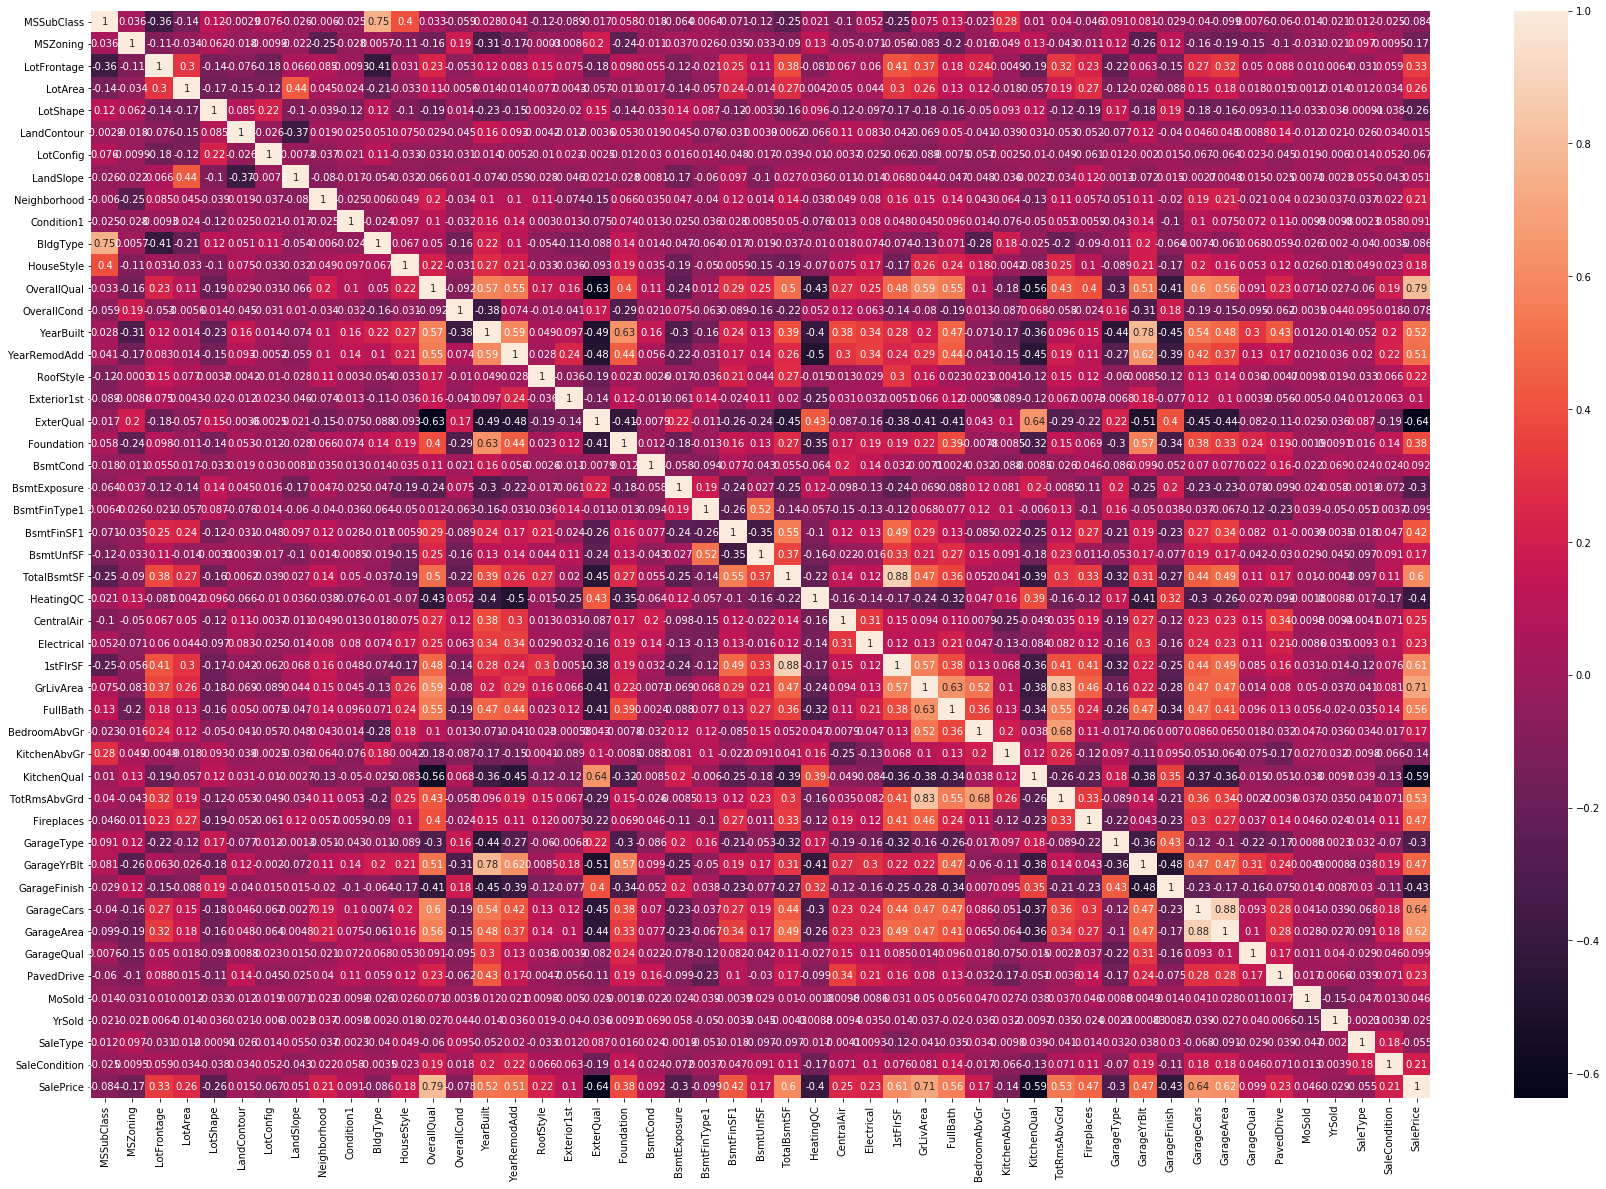

In [17]:
corrr=new_df.corr()
fig=plt.figure(figsize=(30,20))
sns.heatmap(corrr,annot=True)

In [18]:
columns = np.full((corrr.shape[0],), True)
for i in range(corrr.shape[0]):
    for j in range(i+1, corrr.shape[0]):
        if corrr.iloc[i,j] >= 0.7: #Generally correlatiob value <0.7 is considered a strong correaltion
            if columns[j]:
                columns[j] = False
                
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False])

In [19]:
new_df.drop(['1stFlrSF', 'BldgType', 'GarageArea', 'GarageYrBlt','TotRmsAbvGrd'],axis=1,inplace=True)

In [20]:
#Normality
new_df['MSSubClass']=np.log(new_df['MSSubClass'])
new_df['LotArea']=np.log(new_df['LotArea'])

new_df['OverallCond']=np.log(new_df['OverallCond'])
new_df['BsmtFinSF1']=np.log(new_df['BsmtFinSF1'])
new_df['TotalBsmtSF']=np.log(new_df['TotalBsmtSF'])
new_df['GrLivArea']=np.log(new_df['GrLivArea'])
new_df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.094345,3,65.0,9.041922,3,3,4,0,5,2,...,1,2,2,4,2,2,2008,8,4,208500
1,2.995732,3,80.0,9.169518,3,3,2,0,24,1,...,1,2,2,4,2,5,2007,8,4,181500
2,4.094345,3,68.0,9.328123,0,3,4,0,5,2,...,1,2,2,4,2,9,2008,8,4,223500
3,4.248495,3,60.0,9.164296,0,3,0,0,6,2,...,5,3,3,4,2,2,2006,8,0,140000
4,4.094345,3,84.0,9.565214,0,3,2,0,15,2,...,1,2,3,4,2,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,3,62.0,8.976768,3,3,4,0,8,2,...,1,2,2,4,2,8,2007,8,4,175000
1456,2.995732,3,85.0,9.486076,3,3,4,0,14,2,...,1,3,2,4,2,2,2010,8,4,210000
1457,4.248495,3,66.0,9.109636,3,3,4,0,6,2,...,1,2,1,4,2,5,2010,8,4,266500
1458,2.995732,3,68.0,9.181632,3,3,4,0,12,2,...,1,3,1,4,2,4,2010,8,4,142125


In [21]:
#Outliers

from  scipy import stats
z=np.abs(stats.zscore(new_df))
z

threshold=4
print(np.where(z>4))

new_dff=new_df[(z<4).all(axis=1)]
new_dff

(array([   5,    8,    8,    9,   17,   19,   29,   30,   39,   47,   48,
         52,   62,   63,   74,   78,   83,   88,   88,   93,   93,   98,
         98,  102,  106,  109,  113,  120,  137,  144,  146,  149,  154,
        165,  166,  173,  178,  179,  181,  184,  185,  187,  188,  197,
        202,  219,  222,  224,  225,  229,  231,  236,  237,  242,  246,
        249,  249,  250,  253,  268,  271,  289,  313,  313,  314,  314,
        323,  329,  330,  335,  335,  342,  345,  375,  375,  378,  379,
        383,  385,  398,  401,  410,  415,  420,  430,  440,  441,  445,
        450,  454,  456,  456,  460,  469,  482,  488,  494,  495,  502,
        505,  505,  516,  520,  529,  531,  533,  537,  542,  550,  557,
        557,  567,  570,  575,  579,  586,  588,  589,  599,  628,  630,
        631,  634,  635,  635,  637,  643,  651,  664,  676,  676,  676,
        677,  689,  691,  693,  699,  701,  703,  705,  706,  706,  711,
        713,  728,  728,  736,  751,  756,  760,  

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.094345,3,65.0,9.041922,3,3,4,0,5,2,...,1,2,2,4,2,2,2008,8,4,208500
1,2.995732,3,80.0,9.169518,3,3,2,0,24,1,...,1,2,2,4,2,5,2007,8,4,181500
2,4.094345,3,68.0,9.328123,0,3,4,0,5,2,...,1,2,2,4,2,9,2008,8,4,223500
3,4.248495,3,60.0,9.164296,0,3,0,0,6,2,...,5,3,3,4,2,2,2006,8,0,140000
4,4.094345,3,84.0,9.565214,0,3,2,0,15,2,...,1,2,3,4,2,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,3,62.0,8.976768,3,3,4,0,8,2,...,1,2,2,4,2,8,2007,8,4,175000
1456,2.995732,3,85.0,9.486076,3,3,4,0,14,2,...,1,3,2,4,2,2,2010,8,4,210000
1457,4.248495,3,66.0,9.109636,3,3,4,0,6,2,...,1,2,1,4,2,5,2010,8,4,266500
1458,2.995732,3,68.0,9.181632,3,3,4,0,12,2,...,1,3,1,4,2,4,2010,8,4,142125


##Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit_transform(new_dff)

array([[ 0.48400162, -0.05109947, -0.22374422, ...,  0.31358104,
         0.14056419,  0.356747  ],
       [-1.0910109 , -0.05109947,  0.54465736, ...,  0.31358104,
         0.14056419, -0.01873383],
       [ 0.48400162, -0.05109947, -0.0700639 , ...,  0.31358104,
         0.14056419,  0.56534746],
       ...,
       [ 0.70499792, -0.05109947, -0.17251745, ...,  0.31358104,
         0.14056419,  1.16333544],
       [-1.0910109 , -0.05109947, -0.0700639 , ...,  0.31358104,
         0.14056419, -0.56631003],
       [-1.0910109 , -0.05109947,  0.2885235 , ...,  0.31358104,
         0.14056419, -0.49156153]])

In [23]:
x=new_dff.drop(['SalePrice'],axis=1)
y=new_dff['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1202, dtype: int64

In [24]:
x

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,4.094345,3,65.0,9.041922,3,3,4,0,5,2,...,0,1,2,2,4,2,2,2008,8,4
1,2.995732,3,80.0,9.169518,3,3,2,0,24,1,...,1,1,2,2,4,2,5,2007,8,4
2,4.094345,3,68.0,9.328123,0,3,4,0,5,2,...,1,1,2,2,4,2,9,2008,8,4
3,4.248495,3,60.0,9.164296,0,3,0,0,6,2,...,1,5,3,3,4,2,2,2006,8,0
4,4.094345,3,84.0,9.565214,0,3,2,0,15,2,...,1,1,2,3,4,2,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,3,62.0,8.976768,3,3,4,0,8,2,...,1,1,2,2,4,2,8,2007,8,4
1456,2.995732,3,85.0,9.486076,3,3,4,0,14,2,...,2,1,3,2,4,2,2,2010,8,4
1457,4.248495,3,66.0,9.109636,3,3,4,0,6,2,...,2,1,2,1,4,2,5,2010,8,4
1458,2.995732,3,68.0,9.181632,3,3,4,0,12,2,...,0,1,3,1,4,2,4,2010,8,4


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((961, 43), (241, 43), (961,), (241,))

In [26]:
#Modelling
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

##Predicting the model

In [27]:
y_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('R2_SCORE :',r2_score(y_test,y_pred)*100)
print('ADJUSTED R2_SCORE :',(1 - (1-model.score(x,y))*(len(y)-1)/(len(y)-x.shape[1]-1))*100)

R2_SCORE : 86.65682053591769
ADJUSTED R2_SCORE : 86.09754724598648


In [29]:
print('MODEL ACCURACY IN TRAINING PHASE:',model.score(x_train,y_train)*100)
print('MODEL ACCURACY IN TESTING PHASE:',model.score(x_test,y_test)*100)

MODEL ACCURACY IN TRAINING PHASE: 86.57479941547308
MODEL ACCURACY IN TESTING PHASE: 86.65682053591769


##CONCLUSION

####As our model is having LOW BIAS and LOW VARIANCE our model is not over-fit.

In [35]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)